<a href="https://colab.research.google.com/github/Thiago-Reis-Porto/treinamento-h2ia/blob/main/Algoritimo_Genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center><b>Problema da mochila</h1><h1><center>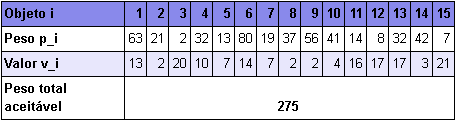

In [ ]:
import random

In [ ]:
weight_capacity = 275
wv_i = [(63,13), (21,2), (2,20), (32,10), (13, 7), (80,14), (19,7), (37,2), (56,2), (41,4), (14,16), (8, 17), (32,17), (42,3), (7,21)]

In [ ]:
print_solution(genetic_knapsack(100,0.03,100,2))

Tamanho da População:  100
Probalidade de Mutação:  0.03
Número de gerações:  100
Elitismo:  2
Melhor Solução: 
-Codificação: 0b101110011110101 
-Items: [1, 3, 5, 6, 7, 8, 11, 12, 13, 15] 
-Peso: 275 
-Valor: 134


In [ ]:
#Gera Soluções Aleatorias
def generate_population(pop_size):
  pop_sample = random.sample(range(32767), pop_size)
  population = []
  for i in pop_sample:
    individual = (solution_fitness(i), i)
    insert_individual(individual, population)
  return population

In [ ]:
def insert_individual(new_indiv, population):
    i = 0
    while i < len(population):
      if population[i][0] < new_indiv[0]:
        break
      i+=1
    population.insert(i, new_indiv)

In [ ]:
#Decodifica Solução e retorna seu peso e valor
def decode_solution(solution):
  weight = 0
  value = 0
  for i in range(15):
    bit = (solution >> i) & 1
    if bit:
      weight += wv_i[i][0]
      value += wv_i[i][1]
  return weight, value

In [ ]:
#Pega o fitness da solução, é zero se ultrapassar o limite de peso da mochila senão é o peso
def solution_fitness(solution):
  weight, value = decode_solution(solution)
  if weight > weight_capacity:
    return 0
  else: return value

In [ ]:
#Muta um bit da solução
def mutate(solution): 
  index = random.randrange(15)
  mutated_solution = solution[1] ^ 1 << index
  mutated_fitness = solution_fitness(mutated_solution)
  return mutated_fitness, mutated_solution

In [ ]:
#Cruzamento retorna dois filhos a partir de dois genomas
def crossover(parent_1, parent_2):
  cuts = [4,8,12]
  cut_1 = random.choice(cuts)
  cut_2 = 15-cut_1

  parent_1_cuts = parent_1[1]&(32767 >> cut_2), parent_1[1] >> cut_1
  parent_2_cuts = parent_2[1]&(32767 >> cut_2), parent_2[1] >> cut_1

  child_1 = parent_1_cuts[0] | (parent_2_cuts[1] << cut_1)
  child_2 = parent_2_cuts[0] | (parent_1_cuts[1] << cut_1)
  
  return [(solution_fitness(child_1), child_1), (solution_fitness(child_2), child_2)]

In [ ]:
#Seleciona dois pais
def parent_selection(population):
  soma = 0
  for i in population:
    soma += i[0]
  p1 = 0
  p2 = 0
  while p1 == p2:
    s1 = random.randrange(soma+1)
    s2 = random.randrange(soma+1)
    aux1 = population[p1][0]
    aux2 = population[p2][0]
  
    while aux1 < s1 or aux2 < s2:

      if aux1 < s1:
        p1 += 1
        aux1 += population[p1][0]

      if aux2 < s2:
        p2 += 1
        aux2 += population[p2][0]
      if p1 == p2: p1 = p2 =0
  return p1, p2

In [ ]:
#Roleta para mutação 
def mutate_bool(mutation_prob):
  m = random.uniform(0, 1)
  if m < mutation_prob:
    return True
  return False

In [ ]:
def genetic_knapsack(pop_size=10, mutation_prob=0.05, n_generatios=5, n_elitism=1):
  population = generate_population(pop_size)
  offspring = []
  
  if pop_size < 1 | n_generatios < 1 | n_elitism > pop_size:
    return

  for i in range(n_generatios):
    p1, p2 = parent_selection(population)
    children = crossover(population[p1],population[p1])
    
    for j in range(n_elitism):
      insert_individual(population[j], offspring)

    if len(offspring) >= pop_size:
      population = offspring
      break

    for j in children:
      if mutate_bool(mutation_prob):
        j = mutate(j)
      insert_individual(j, offspring)
      
      population = offspring

  return pop_size, mutation_prob, n_generatios, n_elitism, population[0]

In [ ]:
def print_solution(result):
  pop_size, mutation_prob, n_generatios, n_elitism, solution = result
  print("Tamanho da População: ", pop_size)
  print("Probalidade de Mutação: ", mutation_prob)
  print("Número de gerações: ", n_generatios)
  print("Elitismo: ", n_elitism)
  weight, value = decode_solution(solution[1])
  items = []
  for i in range(15):
    bit = (solution[1] >> i) & 1
    if bit:
      items.append(i+1)
  print("Melhor Solução: \n-Codificação:",bin(solution[1]),"\n-Items:",items,  "\n-Peso:",weight, "\n-Valor:", value)